In [87]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns

In [88]:
# Función para obtener datetime a partir de un unix timestamp y si es NaN devuelve NaN
def unixtime_to_datetime(unixtime):
    try:
        unixtime = unixtime/1000
        return datetime.datetime.fromtimestamp(int(unixtime)).strftime('%Y-%m-%d')
    except:
        return ''

In [93]:
# 1. Leer lista de investigadores
df_lista_investigadores = pd.read_parquet('processed/parquet/01_lista_investigadores_renacyt.parquet')
df_lista_investigadores = df_lista_investigadores[['ctiVitae','orcid','institucionLaboralPrincipal', 'nombres', 'apellidoPaterno', 'apellidoMaterno']]

df_lista_investigadores['nombreCompleto'] = df_lista_investigadores['nombres'] + ' ' + df_lista_investigadores['apellidoPaterno'] + ' ' + df_lista_investigadores['apellidoMaterno']
df_lista_investigadores.drop(columns=['nombres','apellidoPaterno','apellidoMaterno'], inplace=True)
df_lista_investigadores.drop_duplicates(inplace=True)
df_lista_investigadores.reset_index(drop=True,inplace=True)

df_lista_investigadores['ctiVitae'] = df_lista_investigadores['ctiVitae'].astype(str)
df_lista_investigadores.head()

,ctiVitae,orcid,institucionLaboralPrincipal,nombreCompleto
0,10,0000-0003-1583-7113,UNIVERSIDAD DE LIMA,SILVIA PATRICIA PONCE ALVAREZ
1,13,None,UNIVERSIDAD NACIONAL AGRARIA LA MOLINA,MANUEL ANTONIO CANTO SAENZ
2,16,0000-0001-9740-5490,UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS,ALEXEI VICENT SANTIANI ACOSTA
3,17,0000-0002-8301-5536,UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS,MARTHA ESTHER VALDIVIA CUYA
4,19,0000-0002-8207-9714,UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS,JOSE ALFREDO HERRERA QUISPE


In [94]:
# 2. Leer lista de publicaciones
df_lista_publicaciones = pd.read_parquet('processed/parquet/03_publicaciones_renacyt.parquet')
df_lista_publicaciones = df_lista_publicaciones[['cti_vitae','quartil','descTipoProduccionBibliografica','titulo','revista','idDoi','fechaProduccion']]
df_lista_publicaciones.rename(columns={'cti_vitae':'ctiVitae'},inplace=True)
df_lista_publicaciones.drop_duplicates(inplace=True)
df_lista_publicaciones.reset_index(drop=True,inplace=True)
df_lista_publicaciones = df_lista_publicaciones[df_lista_publicaciones['fechaProduccion']>0]

df_lista_publicaciones['fechaProduccion'] = df_lista_publicaciones['fechaProduccion'].apply(unixtime_to_datetime)
df_lista_publicaciones['fechaProduccion'] = pd.to_datetime(df_lista_publicaciones['fechaProduccion'])
df_lista_publicaciones['año'] = df_lista_publicaciones['fechaProduccion'].dt.year

df_lista_publicaciones['quartil'] = df_lista_publicaciones['quartil'].apply(lambda x: x.strip() if type(x)==str else x)
df_lista_publicaciones['quartil'] = df_lista_publicaciones['quartil'].apply(lambda x: x if x in ['Q1','Q2','Q3','Q4'] else 'Sin quartil')

df_lista_investigadores['ctiVitae'] = df_lista_investigadores['ctiVitae'].astype(str)
df_lista_publicaciones.head()

,ctiVitae,quartil,descTipoProduccionBibliografica,titulo,revista,idDoi,fechaProduccion,año
0,10,Sin quartil,Conference Paper,Development and evaluation of an autonomous an...,Proceedings of SPIE - The International Societ...,www.doi.org/10.1117/12.2647950,2023-01-01,2023
1,10,Q2,Artículo en revista científica,The Applicability of Cellulose — Tara Gum Comp...,"Water, Air, and Soil Pollution",www.doi.org/10.1007/S11270-022-05818-Z,2022-08-01,2022
2,10,Q2,Artículo en revista científica,Cellulose Microfibres Obtained from Agro-Indus...,"Water, Air, and Soil Pollution",www.doi.org/10.1007/S11270-020-04889-0,2020-10-01,2020
3,10,Q2,Artículo en revista científica,TiO<inf>2</inf>:Ce<inf>x</inf>onto Al Clays fo...,International Journal of Photoenergy,www.doi.org/10.1155/2020/8881259,2020-01-01,2020
4,10,Q3,Artículo en revista científica,Treatment of irrigation water infested with ne...,Desalination and Water Treatment,www.doi.org/10.5004/DWT.2020.24842,2020-01-01,2020


In [95]:
# 3. Left join de df_lista_investigadores y df_lista_publicaciones por la columna 'ctiVitae'
df_investigadores_publicaciones = df_lista_investigadores.merge(df_lista_publicaciones,how='left',on='ctiVitae')
df_investigadores_publicaciones

,ctiVitae,orcid,institucionLaboralPrincipal,nombreCompleto,quartil,descTipoProduccionBibliografica,titulo,revista,idDoi,fechaProduccion,año
0,10,0000-0003-1583-7113,UNIVERSIDAD DE LIMA,SILVIA PATRICIA PONCE ALVAREZ,Sin quartil,Conference Paper,Development and evaluation of an autonomous an...,Proceedings of SPIE - The International Societ...,www.doi.org/10.1117/12.2647950,2023-01-01,2023.0
1,10,0000-0003-1583-7113,UNIVERSIDAD DE LIMA,SILVIA PATRICIA PONCE ALVAREZ,Q2,Artículo en revista científica,The Applicability of Cellulose — Tara Gum Comp...,"Water, Air, and Soil Pollution",www.doi.org/10.1007/S11270-022-05818-Z,2022-08-01,2022.0
2,10,0000-0003-1583-7113,UNIVERSIDAD DE LIMA,SILVIA PATRICIA PONCE ALVAREZ,Q2,Artículo en revista científica,Cellulose Microfibres Obtained from Agro-Indus...,"Water, Air, and Soil Pollution",www.doi.org/10.1007/S11270-020-04889-0,2020-10-01,2020.0
3,10,0000-0003-1583-7113,UNIVERSIDAD DE LIMA,SILVIA PATRICIA PONCE ALVAREZ,Q2,Artículo en revista científica,TiO<inf>2</inf>:Ce<inf>x</inf>onto Al Clays fo...,International Journal of Photoenergy,www.doi.org/10.1155/2020/8881259,2020-01-01,2020.0
4,10,0000-0003-1583-7113,UNIVERSIDAD DE LIMA,SILVIA PATRICIA PONCE ALVAREZ,Q3,Artículo en revista científica,Treatment of irrigation water infested with ne...,Desalination and Water Treatment,www.doi.org/10.5004/DWT.2020.24842,2020-01-01,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
44129,353713,0000-0003-1120-1708,None,ELIAS CARLOS AGUIRRE RODRIGUEZ,NaN,NaN,NaN,NaN,NaN,NaT,NaN
44130,354752,None,None,SASSY EMPERATRIZ GAYTAN REYNA,NaN,NaN,NaN,NaN,NaN,NaT,NaN
44131,356746,0000-0001-5650-3668,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE UFRN,ANDRES ORTIZ SALAZAR,NaN,NaN,NaN,NaN,NaN,NaT,NaN
44132,358819,0000-0001-7768-9932,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO (UFRJ),ALEX XIMENES NAVES,NaN,NaN,NaN,NaN,NaN,NaT,NaN


<Axes: xlabel='año'>

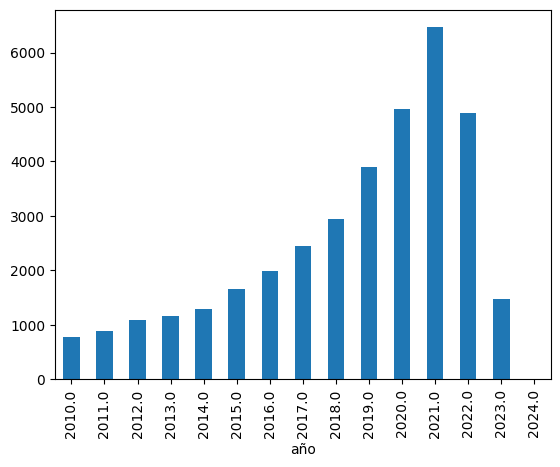

In [97]:
# Dame un grafico de barras con el numero de publicaciones desde el año 2010
df_investigadores_publicaciones[df_investigadores_publicaciones['año']>=2010].groupby('año').count()['ctiVitae'].plot.bar()

<Axes: xlabel='nombreCompleto'>

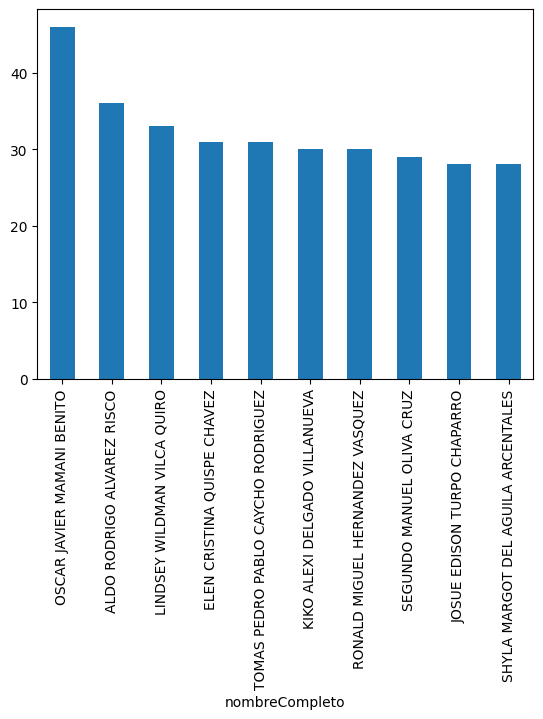

In [105]:
# Dame un grafico de barras con el top 10 de investigadores con mas publicaciones de quartil Q1 en el año 2022
df_plot = df_investigadores_publicaciones[(df_investigadores_publicaciones['año']==2022) & (df_investigadores_publicaciones['quartil']=='Q1')].groupby('nombreCompleto').count()['ctiVitae'].sort_values(ascending=False).head(10)
df_plot.plot.bar()